# Challenge Telecom X – Parte 2: Prevendo Churn
* Autor: Müller Pereira
---

## Objetivo
Desenvolver modelos preditivos capazes de prever quais clientes têm maior chance de cancelar seus serviços.

---

## 📌 Extração
 - Carregamento de bibliotecas
 - Leitura do conjunto de dados

 ---

In [112]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

display(Markdown("### Carregamento das bibliotecas"))

### Carregamento das bibliotecas

In [113]:

display(Markdown('### Leitura do conjunto de dados'))
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

### Leitura do conjunto de dados

In [114]:
df = pd.read_json(url)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


## 🔧 Transformação

---

In [115]:
# Converte as colunas de string para dicionário, se necessário
for col in ['customer', 'phone', 'internet', 'account']:
    # Check if the value is a string before attempting literal_eval
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Expande cada coluna que contém dicionários em novas colunas
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Remove as colunas originais
df = df.drop(columns=['customer', 'phone', 'internet', 'account'])

# Concatena com as colunas expandidas
df = pd.concat([df, customer_df, phone_df, internet_df, account_df], axis=1)

In [116]:
display(Markdown("### Análise inicial do conjunto de dados"))

display(Markdown("### Primeiras linhas"))
display(df.head())

display(Markdown("### Últimas linhas"))
display(df.tail())

display(Markdown("### Informação das variáveis"))
df.info()

display(Markdown("### Quantidade de valores únicos"))
df.nunique()

### Análise inicial do conjunto de dados

### Primeiras linhas

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### Últimas linhas

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


### Informação das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


### Quantidade de valores únicos

customerID          7267
Churn                  3
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Charges.Monthly     1585
Charges.Total       6531
dtype: int64

In [117]:
display(Markdown("### Convertendo a coluna `Charges.Total` para float"))
# Substituir vírgulas por pontos (se necessário)
df['Charges.Total'] = df['Charges.Total'].astype(str).str.replace(',', '.', regex=False)

# Converter a coluna 'col1' para float
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

df.info()

### Convertendo a coluna `Charges.Total` para float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [118]:
display(Markdown("### Verificando valores ausentes"))
df.isna().sum()

### Verificando valores ausentes

customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64

In [119]:
display(Markdown("## Tratando dados ausentes"))
df = df.dropna(subset=['Charges.Total'])
df.isna().sum()

## Tratando dados ausentes

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

In [120]:
display(Markdown("### Dados duplicados"))
df.duplicated().sum()

### Dados duplicados

0

### Características do Dataset

---
A partir das informações iniciais, podemos dizer que:
 - O conjunto de dados tem 7267 unidades amostrais com 21 variáveis
 - As vairáveis são:
  - `customerID`: número de identificação único de cada cliente
  - `Churn`: se o cliente deixou ou não é a empresa
  - `gender`: gênero (masculino e feminino)
  - `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
  - `Partner`: se o cliente possui ou não é parceiro ou parceira
  - `Dependents`: se o cliente possui ou não depende
  - `tenure`: meses de contrato do cliente
  - `PhoneService`: assinatura de serviço telefônico
  - `MultipleLines`:assisnatura de mais de uma linha de telefone
  - `InternetService`: assinatura de um provedor de internet
  - `OnlineSecurity`: assinatura adicional de segurança on-line
  - `OnlineBackup`: assinatura adicional de backup online
  - `DeviceProtection`: assinatura adicional de proteção no dispositivo
  - `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
  - `StreamingTV`: assinatura de TV a cabo
  - `StreamingMovies`: assinatura de streaming de filmes
  - `Contract`: tipo de contrato
  - `PaperlessBilling`: se o cliente preferir receber uma fatura online
  - `PaymentMethod`: forma de pagamento
  - `Charges.Monthly`: total de todos os serviços do cliente por mês
  - `Charges.Total`: gasto total pelo cliente

Além disso, os dados ausentes foram tratatos e não existe dados duplicados.

---

In [121]:
display(Markdown("### Remover colunas que não são relevantes"))
df_final = df.drop(['customerID', 'Partner', 'Dependents', 'MultipleLines', 'OnlineBackup', 
                    'DeviceProtection', 'PaperlessBilling'], axis=1)
df_final.head()

### Remover colunas que não são relevantes

,Churn,gender,SeniorCitizen,tenure,PhoneService,InternetService,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,9,Yes,DSL,No,Yes,Yes,No,One year,Mailed check,65.6,593.30
1,No,Male,0,9,Yes,DSL,No,No,No,Yes,Month-to-month,Mailed check,59.9,542.40
2,Yes,Male,0,4,Yes,Fiber optic,No,No,No,No,Month-to-month,Electronic check,73.9,280.85
3,Yes,Male,1,13,Yes,Fiber optic,No,No,Yes,Yes,Month-to-month,Electronic check,98.0,1237.85
4,Yes,Female,1,3,Yes,Fiber optic,No,Yes,Yes,No,Month-to-month,Mailed check,83.9,267.40


In [122]:
display(Markdown("## Criação da coluna Contas_Diarias"))
# Cria a coluna 'Contas_Diarias' (valor diário proporcional)
df_final['Contas_Diarias'] = (df_final['Charges.Monthly'] / 30).round(2)

# Exemplo das primeiras linhas
df_final[['Charges.Monthly', 'Contas_Diarias']].head()

## Criação da coluna Contas_Diarias

,Charges.Monthly,Contas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


### Verificandos dados inconsistentes

In [123]:
df_final['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3607
Yes                    2074
No internet service    1575
Name: count, dtype: int64

> As colunas `OnlineSecurity`, `TechSupport`, `StreamingTV`, `StreamingMovies` apresentam valores "No internet service", que é referente a não possuir serviço de internet. Mudar para "No".

In [124]:
# Lista de colunas afetadas pela ausência de internet
colunas_servicos_online = [
    'OnlineSecurity', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]

# Substituir "No internet service" → "No"
df_final[colunas_servicos_online] = df_final[colunas_servicos_online].replace(
    'No internet service',
    'No'
)

In [125]:
df_final['OnlineSecurity'].value_counts()

OnlineSecurity
No     5182
Yes    2074
Name: count, dtype: int64

In [126]:
df_final['Churn'].value_counts()

Churn
No     5163
Yes    1869
        224
Name: count, dtype: int64

> A coluna `Churn` possui 224 valores sem classificação alguma. Excluir esses valores.

In [127]:
display(Markdown("### Padronização"))
# @title Padronização
# Lista de colunas binárias
colunas_binarias = [
    'Churn',
    'PhoneService',
    'OnlineSecurity',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

# Filtro para linhas válidas em todas as colunas binárias
filtro = df_final[colunas_binarias].isin(['Yes', 'No']).all(axis=1)
df_filtrado = df_final[filtro]

print(f"Linhas originais: {len(df)}")
print(f"Linhas após exclusão: {len(df_filtrado)}")
print(f"Linhas excluídas: {len(df) - len(df_filtrado)}")

# Converter "Yes/No" para 1/0
df_filtrado[colunas_binarias] = df_filtrado[colunas_binarias].replace({'Yes': '1', 'No': '0'})

# Converter SeniorCitizen para string
df_filtrado['SeniorCitizen']= df_filtrado['SeniorCitizen'].astype(str)

df_filtrado.head()

### Padronização

Linhas originais: 7256
Linhas após exclusão: 7032
Linhas excluídas: 224


C:\Users\mulle\AppData\Local\Temp\ipykernel_12352\1321755101.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado[colunas_binarias] = df_filtrado[colunas_binarias].replace({'Yes': '1', 'No': '0'})
C:\Users\mulle\AppData\Local\Temp\ipykernel_12352\1321755101.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['SeniorCitizen']= df_filtrado['SeniorCitizen'].astype(str)


,Churn,gender,SeniorCitizen,tenure,PhoneService,InternetService,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0,Female,0,9,1,DSL,0,1,1,0,One year,Mailed check,65.6,593.30,2.19
1,0,Male,0,9,1,DSL,0,0,0,1,Month-to-month,Mailed check,59.9,542.40,2.00
2,1,Male,0,4,1,Fiber optic,0,0,0,0,Month-to-month,Electronic check,73.9,280.85,2.46
3,1,Male,1,13,1,Fiber optic,0,0,1,1,Month-to-month,Electronic check,98.0,1237.85,3.27
4,1,Female,1,3,1,Fiber optic,0,1,1,0,Month-to-month,Mailed check,83.9,267.40,2.80


In [128]:
display(Markdown("### Dicionário de Dados"))
# @title Dicionário de Dados

df_dict = pd.DataFrame(
    [
        {'variavel': 'Churn', 'descricao': 'se o cliente deixou ou nao a empresa', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'gender', 'descricao': 'genero (masculino e feminino)', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'SeniorCitizen', 'descricao': 'informacao sobre um cliente ter ou nao idade igual ou maior que 65 anos', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'tenure', 'descricao': 'meses de contrato do cliente', 'tipo': 'quantitativa', 'subtipo': 'discreta'},
        {'variavel': 'PhoneService', 'descricao': 'assinatura de servico telefonico', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'InternetService', 'descricao': 'assinatura de um provedor de internet', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'OnlineSecurity', 'descricao': 'assinatura adicional de seguranca on-line', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'TechSupport', 'descricao': 'assinatura adicional de suporte tecnico, menos tempo de espera', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'StreamingTV', 'descricao': ' assinatura de TV a cabo', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'StreamingMovies', 'descricao': 'assinatura de streaming de filmes', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'Contract', 'descricao': 'tipo de contrato', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'PaymentMethod', 'descricao': 'forma de pagamento', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'Charges.Monthly', 'descricao': 'total de todos os servicos do cliente por mes', 'tipo': 'quantitativa', 'subtipo': 'continua'},
        {'variavel': 'Charges.Total', 'descricao': 'gasto total pelo cliente', 'tipo': 'quantitativa', 'subtipo': 'continua'},
        {'variavel': 'Contas_Diarias', 'descricao': ' calcula o valor diário aproximado', 'tipo': 'quantitativa', 'subtipo': 'continua'}
    ]
)
df_dict

### Dicionário de Dados

,variavel,descricao,tipo,subtipo
0,Churn,se o cliente deixou ou nao a empresa,qualitativa,nominal
1,gender,genero (masculino e feminino),qualitativa,nominal
2,SeniorCitizen,informacao sobre um cliente ter ou nao idade i...,qualitativa,nominal
3,tenure,meses de contrato do cliente,quantitativa,discreta
4,PhoneService,assinatura de servico telefonico,qualitativa,nominal
5,InternetService,assinatura de um provedor de internet,qualitativa,nominal
6,OnlineSecurity,assinatura adicional de seguranca on-line,qualitativa,nominal
7,TechSupport,"assinatura adicional de suporte tecnico, menos...",qualitativa,nominal
8,StreamingTV,assinatura de TV a cabo,qualitativa,nominal
9,StreamingMovies,assinatura de streaming de filmes,qualitativa,nominal


#  🔍 Modelos Preditivos

In [129]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            7032 non-null   object 
 1   gender           7032 non-null   object 
 2   SeniorCitizen    7032 non-null   object 
 3   tenure           7032 non-null   int64  
 4   PhoneService     7032 non-null   object 
 5   InternetService  7032 non-null   object 
 6   OnlineSecurity   7032 non-null   object 
 7   TechSupport      7032 non-null   object 
 8   StreamingTV      7032 non-null   object 
 9   StreamingMovies  7032 non-null   object 
 10  Contract         7032 non-null   object 
 11  PaymentMethod    7032 non-null   object 
 12  Charges.Monthly  7032 non-null   float64
 13  Charges.Total    7032 non-null   float64
 14  Contas_Diarias   7032 non-null   float64
dtypes: float64(3), int64(1), object(11)
memory usage: 879.0+ KB


In [130]:
display(Markdown("### Encode"))
from sklearn.preprocessing import LabelEncoder

# Identifica colunas categóricas (do tipo objeto)
categorical_cols = df_filtrado.select_dtypes(include=["object"]).columns

# Cria um novo DataFrame para armazenar os dados codificados
df_label_encoded = df_filtrado.copy()

# Dicionário para armazenar os codificadores caso queira inverter depois
label_encoders = {}

# Aplica Label Encoding em cada coluna categórica
for col in categorical_cols:
    le = LabelEncoder()
    df_label_encoded[col] = le.fit_transform(df_label_encoded[col])
    label_encoders[col] = le  # salva o codificador

### Encode

In [131]:
df_label_encoded

,Churn,gender,SeniorCitizen,tenure,PhoneService,InternetService,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0,0,0,9,1,0,0,1,1,0,1,3,65.60,593.30,2.19
1,0,1,0,9,1,0,0,0,0,1,0,3,59.90,542.40,2.00
2,1,1,0,4,1,1,0,0,0,0,0,2,73.90,280.85,2.46
3,1,1,1,13,1,1,0,0,1,1,0,2,98.00,1237.85,3.27
4,1,0,1,3,1,1,0,1,1,0,0,3,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0,0,13,1,0,1,1,0,0,1,3,55.15,742.90,1.84
7263,1,1,0,22,1,1,0,0,0,1,0,2,85.10,1873.70,2.84
7264,0,1,0,2,1,0,0,0,0,0,0,3,50.30,92.75,1.68
7265,0,1,0,67,1,0,1,1,0,1,2,3,67.85,4627.65,2.26


In [132]:
display(Markdown("### Proporção de Evasão"))

# Calcular a proporção de clientes ativos e evadidos
churn_counts = df_label_encoded["Churn"].value_counts(normalize=True)

# Exibir os resultados
print("Proporção de clientes ativos (Churn = 0): {:.2%}".format(churn_counts[0]))
print("Proporção de clientes evadidos (Churn = 1): {:.2%}".format(churn_counts[1]))

# Verificar desequilíbrio
if churn_counts[0] > 0.6 or churn_counts[1] > 0.6:
    print("⚠️ Há um certo desequilíbrio entre as classes. Técnicas de balanceamento podem ser necessárias.")
else:
    print("✅ As classes estão relativamente equilibradas.")

### Proporção de Evasão

Proporção de clientes ativos (Churn = 0): 73.42%
Proporção de clientes evadidos (Churn = 1): 26.58%
⚠️ Há um certo desequilíbrio entre as classes. Técnicas de balanceamento podem ser necessárias.


In [133]:
display(Markdown("### Balanceamento com SMOTE"))

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separar variáveis independentes e alvo
X = df_label_encoded.drop("Churn", axis=1)
y = df_label_encoded["Churn"]

# One-hot encoding para variáveis categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

# Dividir dados em treino e teste (com estratificação)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificar nova proporção de classes
resampled_counts = y_train_resampled.value_counts(normalize=True)
print("Distribuição após SMOTE:")
print(resampled_counts)


### Balanceamento com SMOTE

Distribuição após SMOTE:
Churn
1    0.5
0    0.5
Name: proportion, dtype: float64


### Correlação das variáveis com 'Churn'

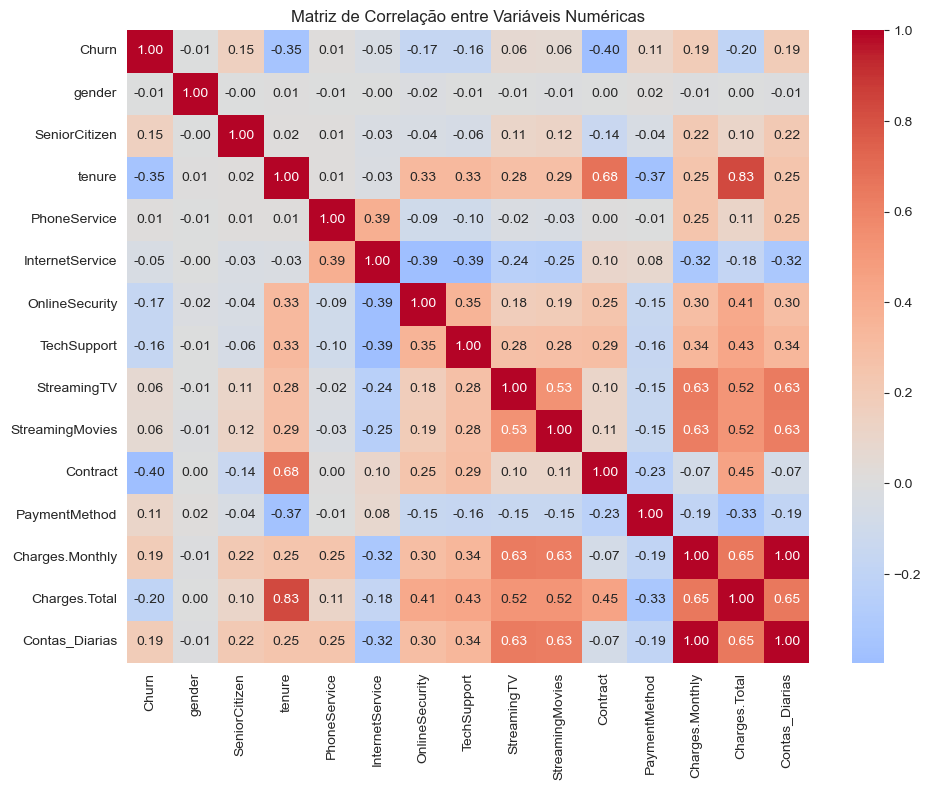

In [134]:
display(Markdown("### Correlação das variáveis com 'Churn'"))

# Calcular a matriz de correlação (apenas variáveis numéricas)
corr_matrix = df_label_encoded.corr(numeric_only=True)

# Exibir heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.tight_layout()
plt.show()

# Ver correlação com a variável Churn (excluindo ela mesma)
correlation_with_churn = corr_matrix["Churn"].drop("Churn").sort_values(ascending=False)


❗ Contratos mais longos (Contract) e maior tempo de relacionamento (tenure) estão associados à não evasão.

❗ Clientes com suporte técnico ou segurança online tendem a permanecer (correlação negativa com evasão).

💰 Maiores cobranças mensais e contas diárias têm correlação positiva com Churn, sugerindo que clientes com faturas mais altas podem estar mais propensos a sair.

### Tempo de Contrato × Evasão

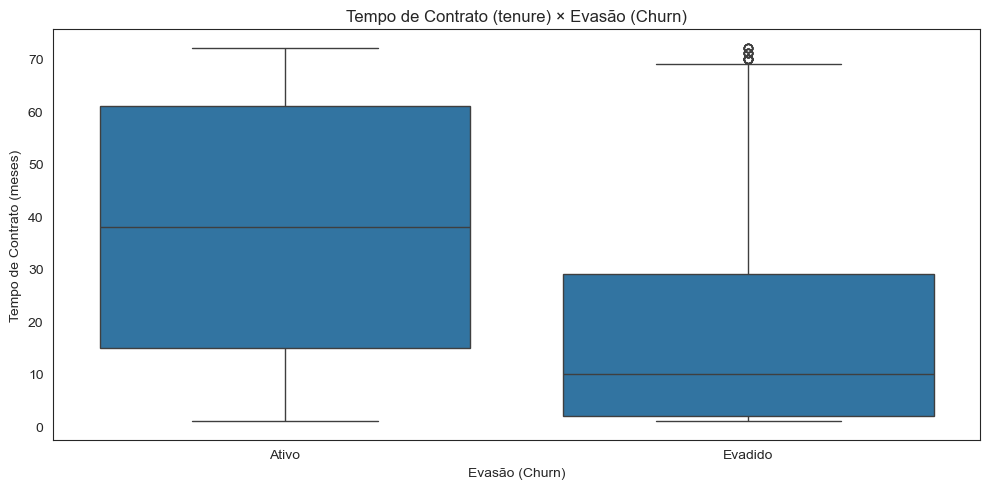

In [135]:
display(Markdown("### Tempo de Contrato × Evasão"))

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_label_encoded, x="Churn", y="tenure")
plt.title("Tempo de Contrato (tenure) × Evasão (Churn)")
plt.xlabel("Evasão (Churn)")
plt.ylabel("Tempo de Contrato (meses)")
plt.xticks([0, 1], ["Ativo", "Evadido"])
plt.tight_layout()
plt.show()


>Clientes com tempo de contrato mais curto têm maior propensão à evasão. Este é um indicador forte para modelos preditivos de churn — o tempo de permanência deve ser tratado como uma variável preditora importante.

### Total Gasto × Tempo de Contrato × Evasão

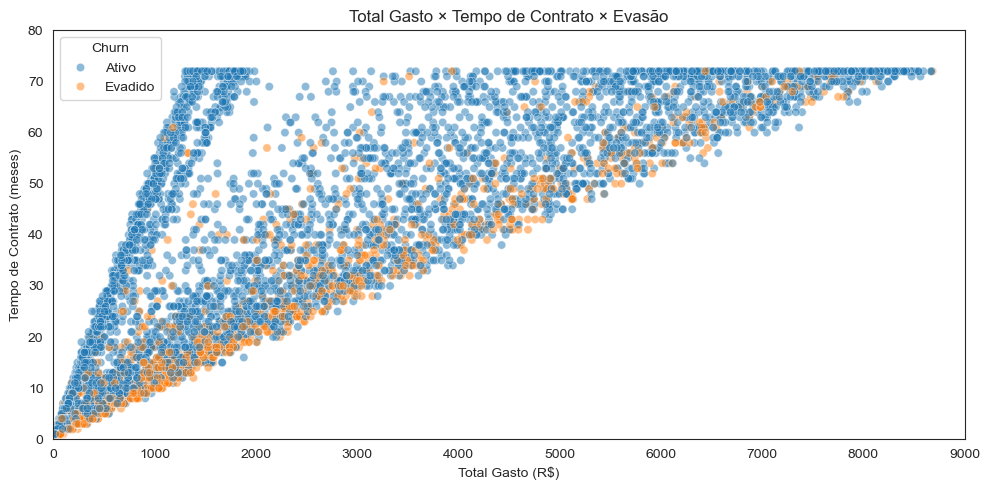

In [136]:
display(Markdown("### Total Gasto × Tempo de Contrato × Evasão"))

plt.figure(figsize=(10, 5))
scatter = sns.scatterplot(
    data=df_label_encoded,
    x="Charges.Total",
    y="tenure",
    hue="Churn",
    alpha=0.5,
    palette={0: "#1f77b4", 1: "#ff7f0e"}
)

# Define a origem dos eixos
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlim(0, 9000)
plt.ylim(0, 80)

plt.title("Total Gasto × Tempo de Contrato × Evasão")
plt.xlabel("Total Gasto (R$)")
plt.ylabel("Tempo de Contrato (meses)")

# Legenda personalizada
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles, labels=["Ativo", "Evadido"], title="Churn")

plt.tight_layout()
plt.show()


- Clientes com pouco tempo de contrato e baixo gasto são mais propensos à evasão.

- O gráfico sugere que quanto mais o cliente gasta e mais tempo ele permanece, menor a chance de evasão.

- Pode ser útil para segmentar clientes com risco iminente de churn (baixa fidelidade e gasto baixo) para ações preventivas.

In [137]:
display(Markdown("### Separação de Dados"))

from sklearn.model_selection import train_test_split

X = df_label_encoded.drop(columns=['Churn'])
y = df_label_encoded['Churn']

# Dividindo em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)

# Exibindo o resultado
print(f"Tamanho do conjunto de treino: {X_train.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}")

### Separação de Dados

Tamanho do conjunto de treino: 4922
Tamanho do conjunto de teste: 2110


In [138]:
display(Markdown("### Criação de Modelos"))

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

# Modelo 1: Árvore de Decisão
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\n📊 Árvore de Decisão")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Modelo 2: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n📊 Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Modelo 3: XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("\n📊 XGBoost")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

### Criação de Modelos


📊 Árvore de Decisão
[[1235  314]
 [ 283  278]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1549
           1       0.47      0.50      0.48       561

    accuracy                           0.72      2110
   macro avg       0.64      0.65      0.64      2110
weighted avg       0.72      0.72      0.72      2110


📊 Random Forest
[[1376  173]
 [ 282  279]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.62      0.50      0.55       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.78      2110


📊 XGBoost
[[1346  203]
 [ 268  293]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.59      0.52      0.55       561

    accuracy                           0.78      211

c:\Users\mulle\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:44:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Avaliação dos Modelos

✅ 1. Resumo das Métricas
| Métrica                 | Árvore de Decisão           | Random Forest               | XGBoost                     |
| ----------------------- | --------------------------- | --------------------------- | --------------------------- |
| **Acurácia**            | 0.72                        | **0.78**                    | **0.78**                    |
| **Precisão (classe 1)** | 0.47                        | **0.62**                    | 0.59                        |
| **Recall (classe 1)**   | 0.50                        | 0.50                        | **0.52**                    |
| **F1-score (classe 1)** | 0.48                        | **0.55**                    | **0.55**                    |
| **Matriz de Confusão**  | `[[1235, 314], [283, 278]]` | `[[1376, 173], [282, 279]]` | `[[1346, 203], [268, 293]]` |
---

📊 2. Avaliação Individual

🌳 **Árvore de Decisão**

Boa acurácia na classe 0, mas fraco para detectar evasores (classe 1).

Recall = 0.50, mas baixa precisão para evasores: 0.47.

Sinais de underfitting: modelo simples demais, não captura bem padrões complexos.

🌲 **Random Forest**

Melhor desempenho geral, especialmente para a classe 0.

Maior precisão (0.62) e F1-score (0.55) para evasores.

Leve queda no recall (0.50), mas boa compensação em precisão.

Boa generalização → não há indícios claros de overfitting.

⚡ **XGBoost**

Acurácia igual à do Random Forest (0.78).

Melhor recall (0.52) entre os três modelos — identifica mais evasores.

F1-score igual ao Random Forest (0.55), mas com um equilíbrio maior entre precisão e recall.

Modelo mais robusto, ligeiramente melhor no equilíbrio entre erros.

---

🧠 3. Comparação e Análise Crítica

🏆 Melhor Desempenho
Empate técnico entre Random Forest e XGBoost:

RF: melhor precisão e estabilidade.

XGB: melhor recall (importante para churn!).

Recomendação prática: usar XGBoost se quiser minimizar perda de clientes (maior recall).

---

🔍 4. Diagnóstico de Overfitting / Underfitting
| Modelo            | Diagnóstico    | Justificativa                                  | Ajustes sugeridos                                    |
| ----------------- | -------------- | ---------------------------------------------- | ---------------------------------------------------- |
| Árvore de Decisão | ❌ Underfitting | Modelo simples demais, perde padrões complexos | Aumentar profundidade (`max_depth`), usar pruning    |
| Random Forest     | ✅ Bem ajustado | Bom equilíbrio e generalização                 | Pode ajustar `n_estimators`, `max_features`          |
| XGBoost           | ✅ Bem ajustado | Leve vantagem no recall, sem overfitting       | Ajustar `learning_rate`, `n_estimators`, `max_depth` |

---

📝 Conclusão

Random Forest: melhor em precisão → bom para minimizar falsos positivos.

XGBoost: melhor em recall → ideal para detecção de evasores (clientes que efetivamente saem).

Árvore de Decisão: desempenho inferior; pode ser útil apenas com tuning e análise interpretável.

---


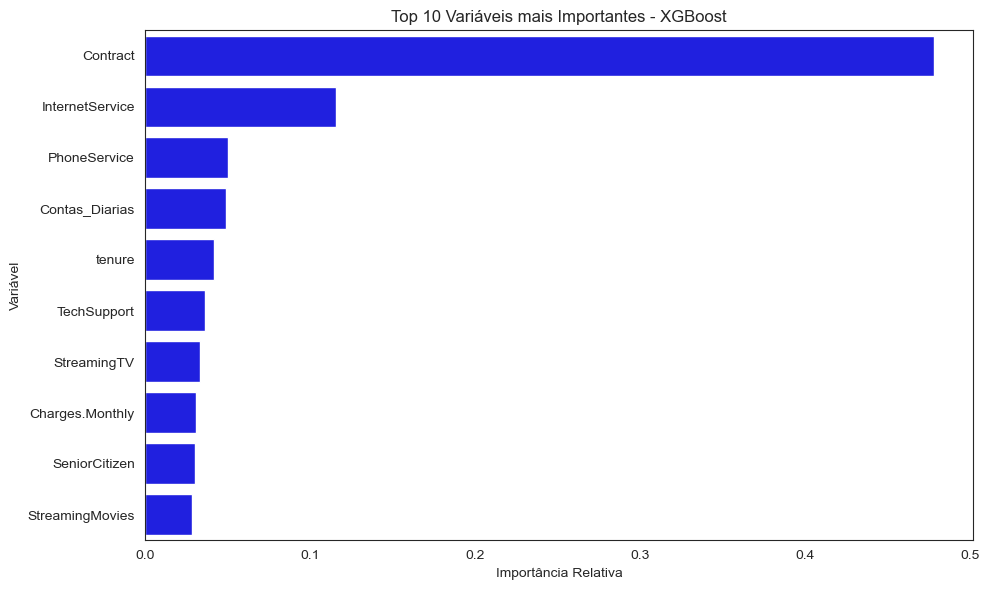

In [139]:
# Obter importância das variáveis
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X_encoded.columns)
top_xgb_features = xgb_importance.sort_values(ascending=False).head(10)

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_xgb_features.values, y=top_xgb_features.index, color="blue")
plt.title("Top 10 Variáveis mais Importantes - XGBoost")
plt.xlabel("Importância Relativa")
plt.ylabel("Variável")
plt.tight_layout()
plt.show()

🧠 Interpretação Crítica

- Contract domina a importância (quase 50%), mostrando que o tipo de contrato é decisivo para prever a evasão.

- A presença de serviços adicionais (TechSupport, StreamingTV, StreamingMovies) parece reduzir a chance de churn, sugerindo que clientes mais envolvidos com os serviços tendem a permanecer.

- Variáveis financeiras (Charges.Monthly, tenure) confirmam que tempo de permanência e custo mensal são fatores-chave na decisão do cliente.

## 📋 Relatório de Análise Preditiva de Evasão de Clientes – TelecomX

### 🎯 Objetivo
O objetivo deste estudo é identificar os principais fatores que levam à evasão de clientes em uma empresa de telecomunicações e propor estratégias de retenção com base em dados históricos e modelos de aprendizado de máquina.

### 🔍 Modelos Utilizados e Desempenho
✅ Modelos avaliados:

- Árvore de Decisão

- Random Forest

- XGBoost

| Modelo            | Acurácia | Precisão (classe 1) | Recall (classe 1) | F1-score (classe 1) |
| ----------------- | -------- | ------------------- | ----------------- | ------------------- |
| Árvore de Decisão | 0.72     | 0.47                | 0.50              | 0.48                |
| Random Forest     | 0.78     | 0.62                | 0.50              | 0.55                |
| XGBoost           | 0.78     | 0.59                | 0.52              | 0.55                |


➡️ Melhor modelo:
XGBoost e Random Forest tiveram desempenho semelhante. O XGBoost demonstrou ligeira vantagem no recall para a classe de evasores, sendo mais sensível à identificação de clientes propensos a cancelar.

### 🌐 Principais Fatores que Influenciam a Evasão
Com base na importância das variáveis nos modelos Random Forest e XGBoost, os principais fatores identificados foram:

| Variável                 | Interpretação e Impacto                                                                                                     |
| ------------------------ | --------------------------------------------------------------------------------------------------------------------------- |
| **Contract**             | Contratos mensais estão fortemente associados à evasão. Clientes com contratos anuais ou bianuais tendem a permanecer mais. |
| **InternetService**      | Clientes com **Fiber Optic** apresentaram maior propensão ao churn em comparação com DSL ou sem serviço.                    |
| **tenure**               | Clientes com pouco tempo de casa (baixa tenure) são mais propensos a sair.                                                  |
| **MonthlyCharges**       | Altos valores mensais estão relacionados com maior risco de evasão.                                                         |
| **TechSupport**          | A presença de suporte técnico reduz significativamente a chance de churn.                                                   |
| **StreamingTV / Movies** | Uso de serviços de entretenimento indica maior engajamento e menor risco de churn.                                          |
| **PaymentMethod**        | Clientes que pagam com **cheque eletrônico** tendem a evadir mais. Métodos automáticos têm relação com maior retenção.      |
| **SeniorCitizen**        | Leve tendência de maior evasão entre clientes idosos.                                                                       |


### 🧠 Análise Crítica e Diagnóstico
- Contracto é consistentemente o fator mais importante nos modelos, mostrando que o tipo de vínculo contratual é determinante para o comportamento do cliente.

- Clientes novos (tenure baixo) estão mais inseguros ou insatisfeitos, exigindo atenção especial nos primeiros meses.

- Altos custos mensais (MonthlyCharges) aumentam a insatisfação, especialmente quando não há uso intensivo de serviços.

- Suporte técnico e serviços de entretenimento aumentam o valor percebido, reforçando a fidelização.

### 💡 Recomendações Estratégicas de Retenção
🔒 Fidelização via Contrato:
- Incentivar contratos anuais ou bienais com descontos ou benefícios exclusivos.

- Oferecer renegociação facilitada para clientes em risco (com baixa tenure e contrato mensal).

🤝 Suporte e Atendimento:
- Garantir que novos clientes recebam acompanhamento nos primeiros 3 meses.

- Oferecer suporte técnico proativo (diagnóstico remoto, tutoriais, canal exclusivo).

📺 Engajamento com Serviços:
- Criar pacotes personalizados com serviços de streaming, especialmente para clientes com alto valor mensal.

- Monitorar a adesão aos serviços e enviar ofertas direcionadas conforme perfil de consumo.

💳 Flexibilidade de Pagamento:
- Incentivar pagamentos automáticos com cashback ou bônus.

- Evitar fricções com métodos propensos à evasão, como cheque eletrônico.

📊 Segmentação e Monitoramento:
- Criar um score de risco de churn com base em:

    - Contrato mensal

    - Permanência < 6 meses

    - Sem Suporte Técnico

    - Pagamento via Cheque Eletrônico

Utilizar esse score para ações preditivas de retenção com marketing direto e ofertas específicas.

### 📈 Próximos Passos Sugeridos
- Aprofundar a análise com técnicas como SHAP Values para interpretação individual das previsões.

- Realizar testes A/B das estratégias de retenção propostas.

- Integrar o modelo em sistemas de CRM para ação em tempo real.